In [1]:
import pandas as pd
import json
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'text.usetex' : True})
sns.set_style("white")

## Load Data + Create Pivots

In [2]:
adult = (pd.read_csv('adultEqOp2.csv')
         .drop('Unnamed: 0', axis = 1)
         .assign(eqOp=lambda df: df.eqOpTrue*0.67+df.eqOpFalse*.33,
                eqOpTrain=lambda df: df.eqOpTrue_train*0.67+df.eqOpFalse_train*.33))

dataset = "Adult"
results_path ='adult_eqop2/'

color_1 = "#329932"
color_2 = "#ff6961"
color_3 = "#2c7fb8"

In [3]:
adult.columns

Index(['accuracy', 'accuracy_std', 'accuracy_train', 'complexity',
       'complexity_final', 'epsilon', 'eqOpTrue_train', 'eqOpFalse_train',
       'accTrue_train', 'accFalse_train', 'eqOpTrue', 'eqOpFalse',
       'epsOpTrue_std', 'epsOpFalse_std', 'eps_test_std', 'accTrue',
       'accFalse', 'ip', 'eps_test', 'acc_diff', 'eps_train', 'acc_diff_train',
       'eqOp', 'eqOpTrain'],
      dtype='object')

In [4]:
adult.iloc[np.argmin(adult['eps_test']),:]

accuracy            7.840909e-01
accuracy_std        3.808354e-02
accuracy_train      7.892169e-01
complexity          7.000000e+01
complexity_final    2.900000e+01
epsilon             0.000000e+00
eqOpTrue_train      2.071560e-01
eqOpFalse_train     2.071563e-01
accTrue_train       7.337135e-01
accFalse_train      9.015077e-01
eqOpTrue            2.217327e-01
eqOpFalse           2.179487e-01
epsOpTrue_std       2.217327e-01
epsOpFalse_std      2.179487e-01
eps_test_std        3.784028e-03
accTrue             7.246075e-01
accFalse            9.043707e-01
ip                  6.200500e+03
eps_test            3.784028e-03
acc_diff            1.797632e-01
eps_train           3.148703e-07
acc_diff_train      1.677943e-01
eqOp                2.204840e-01
eqOpTrain           2.071561e-01
Name: 27, dtype: float64

In [5]:
adult_eps = (adult[(adult.epsilon <= 0.5)]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse =lambda df: 1- df.eqOpFalse,
             eqOpTrain =lambda df: 1 - df.eqOpTrain,
             eqOp =lambda df: 1 - df.eqOp,
             eqOpTrue_train =lambda df: 1 - df.eqOpTrue_train,
             eqOpFalse_train =lambda df: 1 - df.eqOpFalse_train
            ))

adult_compl = (adult[adult.epsilon > 0]
           .sort_values(by='complexity', ascending=True)
           .groupby(['complexity'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse = lambda df:1- df.eqOpFalse,
             eqOpTrain = lambda df:1 - df.eqOpTrain,
             eqOp =lambda df: 1 - df.eqOp,
             eqOpTrue_train = lambda df:1 - df.eqOpTrue_train,
             eqOpFalse_train = lambda df: 1 - df.eqOpFalse_train))

adult_eps_test = (adult
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse =lambda df: 1- df.eqOpFalse,
             eqOpTrue_train =lambda df: 1 - df.eqOpTrue_train,
             eqOpFalse_train =lambda df: 1 - df.eqOpFalse_train))

## Fairness Story

In [6]:
#wide = adult_eps[['epsilon', 'eqOpTrue_train', 'eqOpTrue']].set_index('epsilon')
#sns.lineplot(wide)

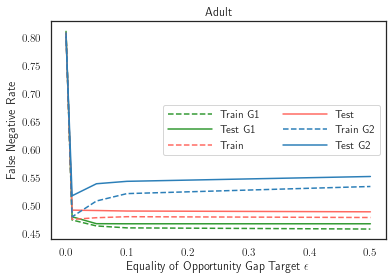

In [7]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOp', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('False Negative Rate')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpCurve.pdf',dpi=300)

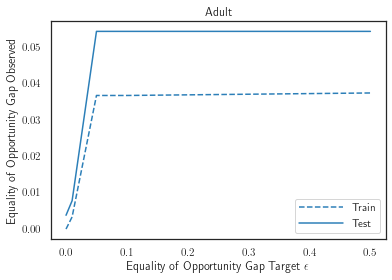

In [8]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_eqOpGap.pdf',dpi=300)

In [9]:
adult_eps[adult_eps.epsilon == adult_eps.epsilon.min()]

,epsilon,ip,eps_test,eps_train,acc_diff,accuracy,accuracy_train,accTrue_train,accFalse_train,eqOp,eqOpTrue,eqOpFalse,eqOpTrain,eqOpTrue_train,eqOpFalse_train,accTrue,accFalse,cumAcc
0,0.0,5117.5,0.003784,2.377647e-07,0.141333,0.822021,0.826685,0.783517,0.914146,0.805457,0.812775,0.802682,0.810734,0.810734,0.810734,0.774758,0.916091,0.822021


## Accuracy Story

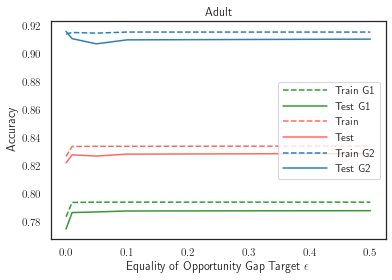

In [10]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracy.pdf',dpi=300)

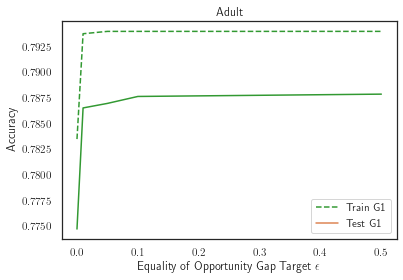

In [11]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG1.pdf',dpi=300)

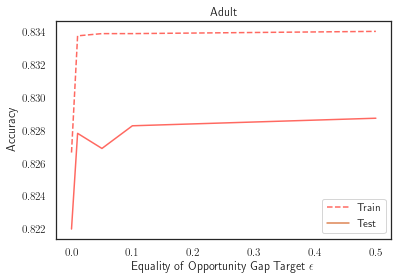

In [12]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[1].set_color(color_2)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyOverall.pdf',dpi=300)

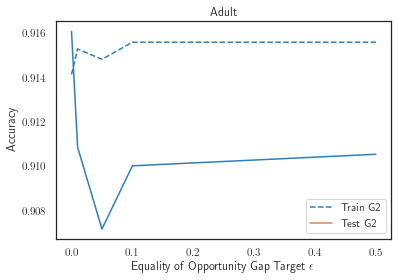

In [13]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[1].set_color(color_3)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG2.pdf',dpi=300)

In [14]:
adult_eps_test_1 = adult_eps_test.append(pd.DataFrame({'eps_test':[0.5], 'cumAcc': [adult_eps_test.cumAcc.max()]}))

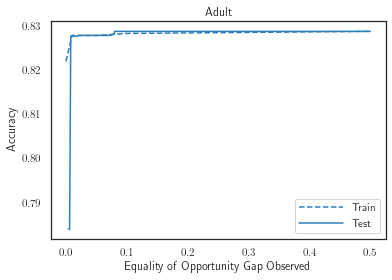

In [15]:
#add std. dev. + complete to trivial
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'cumAcc', label = 'Train')
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

sns.lineplot(data=adult_eps_test_1, x='eps_test', y = 'cumAcc', label = 'Test')
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyFairTradeOff.pdf',dpi=300)

## Complexity Story

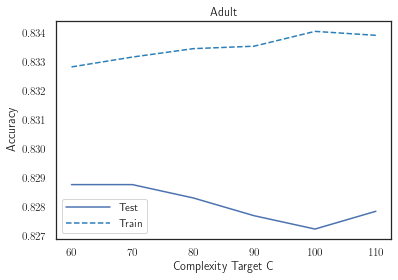

In [16]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')
ax.lines[1].set_linestyle("--")
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower left', handlelength=4)


sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyComplexity.pdf',dpi=300)

Text(0.5, 1.0, 'Adult')

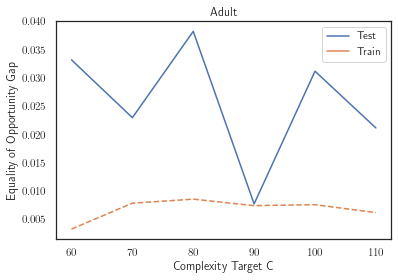

In [17]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_test', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap')
sns.mpl.pyplot.title(dataset)


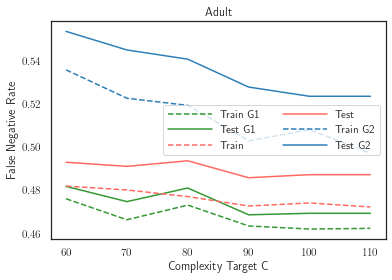

In [18]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOp', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('False Negative Rate')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpComplexity.pdf',dpi=300)

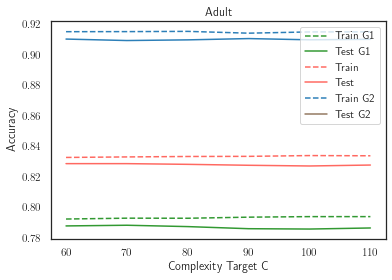

In [19]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_complexityGroupAccuracy.pdf',dpi=300)

## Comparison Story

In [20]:
benchmarks = (pd.read_csv('benchmark_adult.csv')
              .drop('Unnamed: 0', axis=1)
             .append(pd.DataFrame({'algo':['cart', 'logreg','cart', 'logreg','logreg'], 
                                   'cumAcc':[0.76,0.76,0.76,0.76,0.801], 
                                   'EqOfOp':[0,0,0.082,0.035,0.2]})))

adult_eps_test_full =adult_eps_test.append(pd.DataFrame({'eps_test':[0,0.00378,0.2], 
                                   'cumAcc':[0.76,0.76,0.83]}))

In [21]:
adult_eps_test.cumAcc.max()

0.8287776412776413

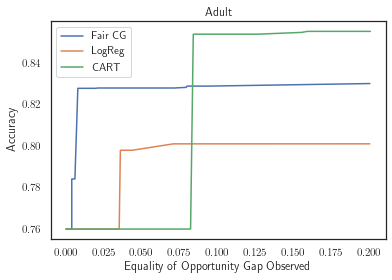

In [22]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_eps_test_full, x='eps_test', y = 'cumAcc', label = 'Fair CG')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')
sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_benchmark.pdf',dpi=300)

In [23]:
1/0

ZeroDivisionError: division by zero

# ROUGH

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')
plt.savefig("adult_EpsVAccuracy.png")

In [ ]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')
plt.savefig("adult_EpsVEqOp.png")

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')

In [ ]:
#Good chart
#Throw in population

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity Trrain (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
#Good chart - tradeoff between interpret. and fairness
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'ip')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
#plt.savefig("adult_hammingVeps.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
#add std. dev. + complete to trivial
benchmarks = pd.read_csv('benchmark_adult.csv')

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')

In [ ]:
%time print('hi')